# Intro

Este doc mostra os princípios básicos sobre cm treinar e avaliar um modelo de ML no scikit-learn e no H2O. Essas são 2 ferramentas mt ≠s, c ≠s restrições e capacidades. No entanto, o processo de ML é o mm: carregar os dados, dividi-los, treinar o modelo e avaliá-lo.

Tanto o **scikit-learn** qt o **H2O** têm mts algoritmos ≠s, c mts config ≠s. Este é apenas um ex q pode ser facilmente adaptado

In [1]:
# pip install pandas scikit-learn h2o graphviz palettable matplotlib numpy seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import h2o
from h2o.estimators import H2ODeepLearningEstimator
import numpy as np
import graphviz
import VisualizeNN as VisNN
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import os

# Split de treinamento/teste, usando uma tree de decisão de classificação c scikit-learn
Neste caso, vamos carregar um conj de dados c características sobre o vinho (vinho verde). O objetivo é treinar um modelo pra distinguir entre vinhos brancos e tintos (classificação binomial)

In [2]:
# Carrega os dados do CSV e armazena-os em um DataFrame do pandas chamado 'df'.
df = pd.read_csv('datasets/vinho_verde.csv')

# Exibe as primeiras 10 linhas do DataFrame pra visualizar uma amostra inicial dos dados.
df.head(10)

# Exibe a forma (n. de linhas e colunas) do DataFrame, indicando o tam do conj de dados.
df.shape

(6497, 13)

In [3]:
# Exibe o conteúdo completo do DataFrame 'df'.
# Isso mostrará tds as linhas e colunas do conj de dados carregado.
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides numeric,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,tinto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,branco
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,branco
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,branco
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,branco


In [4]:
# Divide aleatoriamente os dados em 2 conj disjuntos: train e test
# O parâmetro 'test_size=0.25' indica q 25% dos dados serão usados pra o conj de teste, enqt os 75% restantes serão usados pra o conj de treino.
train, test = train_test_split(df, test_size=0.25)

# Exibe o n. de linhas (amostras) no conj de treino.
print(len(train))

# Exibe o n. de linhas (amostras) no conj de teste.
print(len(test))

4872
1625


In [5]:
# O scikit-learn trabalha apenas c variáveis numéricas, ent é necessário converter a variável alvo ('tipo') pra valores numéricos.
# Aqui, a classe 'branco' é representada pelo valor 0 e a classe 'tinto' pelo valor 1.
# No conj de treino, a coluna 'tipo' é convertida: Se o valor for 'branco', será substituído por 0; caso contrário, será substituído por 1.
train['tipo'] = np.where(train['tipo'] == 'branco', 0, 1)

# No conj de teste, a mm conversão é aplicada à coluna 'tipo'.
test['tipo'] = np.where(test['tipo'] == 'branco', 0, 1)

In [6]:
# Treina um modelo de tree de decisão.

# Seleciona as features de treino (variáveis independentes, entrada).
# Aqui, tds as colunas, exceto a última, são usadas cm variáveis de entrada.
X = train.iloc[:,:-1]

# Seleciona a variável alvo (variável dependente, saída), q é a coluna 'tipo'.
Y = train['tipo']

# Cria um modelo de tree de decisão usando a classe DecisionTreeClassifier do scikit-learn.
wine_tree = tree.DecisionTreeClassifier()

# Treina o modelo c os dados de treino (X e Y).
wine_tree.fit(X, Y)

DecisionTreeClassifier()

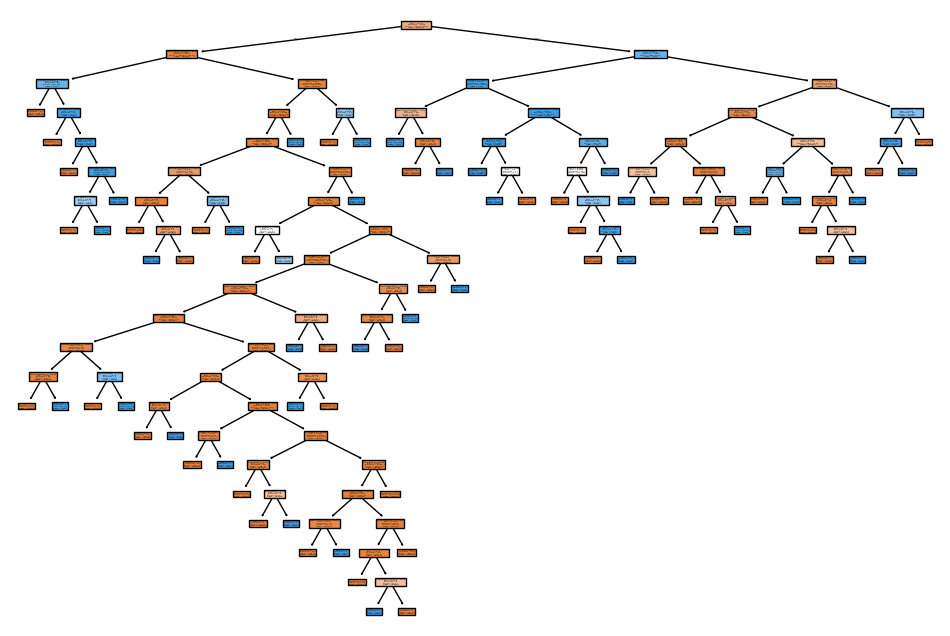

In [7]:
# Cria uma nova figura pra o gráfico c o tam especificado (12 de largura por 8 de altura).
plt.figure(figsize=(12, 8))

# Plota a tree de decisão treinada (wine_tree).
# - feature_names=df.columns: Usa os nomes das colunas do DataFrame cm rótulos das features (entradas).
# - class_names=['branco', 'tinto']: Define os nomes das classes (saída) cm 'branco' e 'tinto'.
# - filled=True: Preenche os nós da tree c cores q representam a classe predominante em cd node.
plot_tree(wine_tree, feature_names=df.columns, class_names=['branco', 'tinto'], filled=True)

# Exibe o gráfico gerado.
plt.show()

In [8]:
os.environ["PATH"] += os.pathsep + r"D:\Program Files\Graphviz\bin"

# Visualiza a tree de decisão.

# Em sistemas macOS, o Graphviz precisa ser instalado usando o comando 'brew install graphviz', pois o 'pip install graphviz' instala apenas o wrapper Python, n o software Graphviz em si.

# Exporta a tree de decisão treinada (wine_tree) pra o formato DOT, q é usado pelo Graphviz.
# - feature_names=X.columns: Usa os nomes das colunas de X cm rótulos das features (entradas).
# - class_names=['white', 'red']: Define os nomes das classes cm 'white' e 'red'.
# - filled=True: Preenche os nodes da tree c cores q representam a classe predominante.
# - rounded=True: Usa bordas arredondadas nos nodes pra mlhrar a visualização.
dot_data = tree.export_graphviz(wine_tree, out_file=None, feature_names=X.columns, class_names=['white', 'red'], filled=True, rounded=True) 

# Cria uma fonte Graphviz a partir dos dados DOT exportados.
graph = graphviz.Source(dot_data) 

# Renderiza a tree de decisão em um file chamado "wine" (por default, será gerado um PDF).
graph.render("wine")

'wine.pdf'

In [9]:
# Avalia a tree de decisão no conj de teste.

# Gera as previsões do modelo (wine_tree) pra os dados de teste.
# Aqui, tds as colunas, exceto a última, são usadas cm entrada pra o modelo.
predictions = wine_tree.predict(test.iloc[:,:-1])

# Obtém os valores reais da variável alvo ('tipo') no conj de teste.
real_values = test['tipo']

# Calcula a precisão do modelo comparando as previsões c os valores reais.
# 'res' é uma lista booleana indicando se cd previsão está correta (True) ou n (False).
res = predictions == real_values

# Filtra apenas os casos corretos (True) na list 'res'.
correct = [x for x in res if x]

# Calcula a precisão cm a proporção de previsões corretas em relação ao total de previsões.
accuracy = len(correct) / len(res)

# Exibe a precisão do modelo em %, arredondada pra 2 casas decimais.
print('This tree gets it right '+str(round(accuracy*100,2))+'% of the times')

This tree gets it right 97.97% of the times


In [10]:
# outra forma de calcular a precisão é usar a função score do modelo, q calcula a precisão diretamente nos dados de teste.
wine_tree.score(test.iloc[:,:-1], real_values)

0.9796923076923076

## Use o modelo treinado pra fzr previsões em uma linha específica de dados

In [11]:
# Cria um novo DataFrame chamado 'row' c as mm colunas q o DataFrame original 'df', exceto a última coluna (q geralmente é a variável alvo).
row = pd.DataFrame(columns=df.columns[:-1])

# Adiciona uma nova linha ao DataFrame 'row' c os valores fornecidos.
# Os valores representam as características (features) de uma nova amostra.
row.loc[0] = [11.2, 0.28, 0.8, 3, 0.075, 17, 60, 0.998, 4, 0.58, 9.8, 6]

# Exibe o DataFrame 'row', q contém a nova amostra criada.
row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides numeric,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.2,0.28,0.8,3.0,0.075,17.0,60.0,0.998,4.0,0.58,9.8,6.0


In [12]:
# Faz uma previsão c a tree de decisão treinada (wine_tree) pra a nova amostra 'row'.
wine_tree.predict(row)

array([0])

## Treine outra tree, c algumas opções personalizadas

In [13]:
# Treina um modelo de tree de decisão c parâmetros personalizados.

# Cria um modelo de tree de decisão (wine_tree2) c os seguintes parâmetros:
# - criterion='entropy': Usa a entropia cm critério pra medir a qualidade das divisões.
# - splitter='random': Escolhe aleatoriamente a feature pra dividir os nós.
# - max_depth=5: Define a profundidade máx da tree cm 5.
# - min_samples_split=10: Exige pelo - 10 amostras pra dividir um nó.
# - min_samples_leaf=5: Exige pelo - 5 amostras em cd folha.
wine_tree2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)

# Treina o modelo wine_tree2 c os dados de treino (X e Y).
wine_tree2.fit(X, Y)

# Visualiza a tree de decisão treinada.

# Exporta a tree de decisão pra o DOT, usado pelo Graphviz.
# - feature_names=X.columns: Usa os nomes das colunas de X cm rótulos das features (entradas).
# - class_names=['white', 'red']: Define os nomes das classes cm 'white' e 'red'.
# - filled=True: Preenche os nós da tree c cores q representam a classe predominante.
# - rounded=True: Usa bordas arredondadas nos nós pra mlhrar a visualização.
dot_data = tree.export_graphviz(wine_tree2, out_file=None, feature_names=X.columns, class_names=['white', 'red'], filled=True, rounded=True) 

# Cria uma fonte Graphviz a partir dos dados DOT exportados.
graph = graphviz.Source(dot_data) 

# Renderiza a tree de decisão em um file chamado "wine2" (por default, será gerado um PDF).
graph.render("wine2") 

# Avalia a precisão do modelo no conj de teste.
# Usa o método score, q calcula a proporção de previsões corretas.
accuracy = wine_tree2.score(test.iloc[:,:-1], real_values)

# Exibe a precisão do modelo em %, arredondada pra 2 casas decimais.
print('This tree gets it right '+str(round(accuracy*100,2))+'% of the times')

This tree gets it right 96.55% of the times


# Treine uma rede neural, c alguns parâmetros personalizados

In [14]:
# Agr vamos treinar uma rede neural.

# Cria um modelo de rede neural (nn) usando a classe MLPClassifier do scikit-learn.
# - max_iter=200: Define o n. máx de iterações pra o treinamento cm 200.
# - activation='tanh': Usa a função de ativação tangente hiperbólica (tanh) nos neurônios.
# - hidden_layer_sizes=[10,5,2]: Define a arquitetura da rede neural c 3 camadas ocultas:
#   - A primeira camada oculta tem 10 neurônios.
#   - A segunda camada oculta tem 5 neurônios.
#   - A terceira camada oculta tem 2 neurônios.
nn = MLPClassifier(max_iter=200, activation='tanh', hidden_layer_sizes=[10,5,2])

# Treina o modelo de rede neural (nn) c os dados de treino (X e Y).
# - X: Conj de treino c as variáveis independentes (features de entrada).
# - Y: Conj de treino c a variável dependente (alvo ou saída).
nn.fit(X, Y)

d:\githubProjects\ia-fp5\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=[10, 5, 2])

In [15]:
# Avalia a precisão da rede neural no conj de teste.

# Usa o método score da rede neural (nn) pra calcular a proporção de previsões corretas.
# - test.iloc[:,:-1]: Fornece as features (entradas) do conj de teste, excluindo a última coluna.
# - real_values: Contém os valores reais da variável alvo ('tipo') no conj de teste.
accuracy = nn.score(test.iloc[:,:-1], real_values)

# Exibe a precisão da rede neural em %, arredondada pra 2 casas decimais.
print('This neural network gets it right '+str(round(accuracy*100,2))+'% of the times')

This neural network gets it right 98.77% of the times


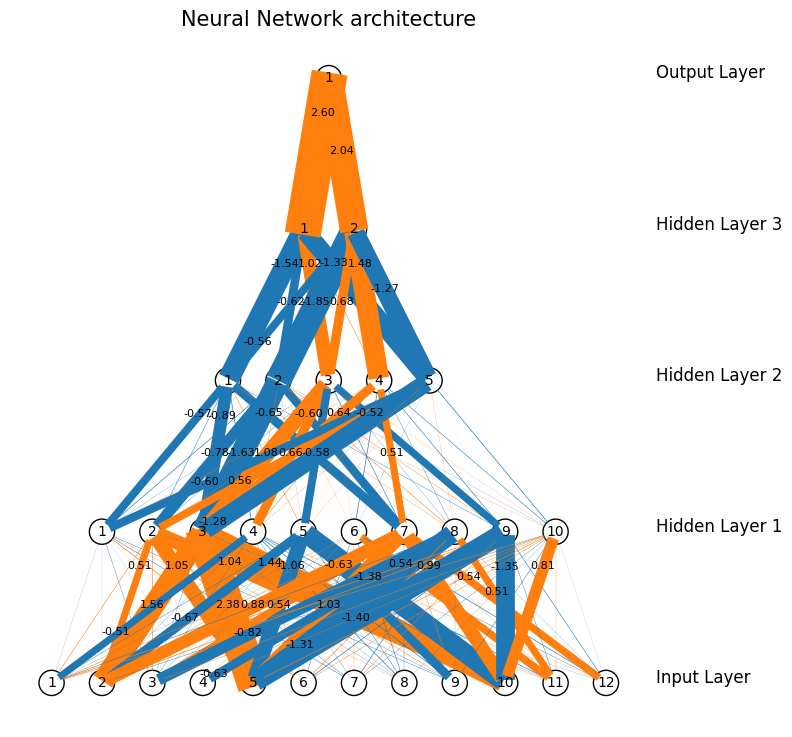

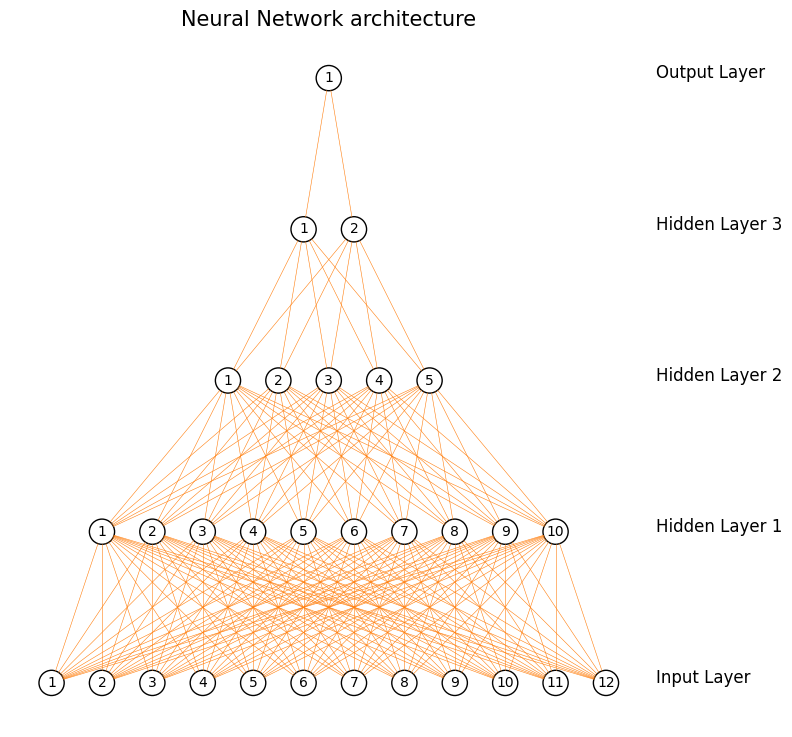

In [ ]:
# Visualiza a estrutura da rede neural.

# Define a estrutura da rede neural (network_structure).
# - X.shape[1]: N. de neurônios na camada de entrada (= ao n. de features de entrada).
# - np.asarray(nn.hidden_layer_sizes): n. de neurônios em cd camada oculta, conforme definido no modelo.
# - [1]: n. de neurônios na camada de saída (1, pois é um problema de classificação binária).
network_structure = np.hstack(([X.shape[1]], np.asarray(nn.hidden_layer_sizes), [1]))

# Desenha a rede neural c os pesos aprendidos durante o treinamento.
# - network_structure: Estrutura da rede neural (camadas e n. de neurônios).
# - nn.coefs_: Pesos aprendidos pelo modelo durante o treinamento.
network = VisNN.DrawNN(network_structure, nn.coefs_)
network.draw()

# Desenha a rede neural sem os pesos (apenas a estrutura).
# - network_structure: Estrutura da rede neural (camadas e n. de neurônios).
network = VisNN.DrawNN(network_structure)
network.draw()

# Treine um classificador de tree de decisão, mas agr c validação cruzada de 5x

In [ ]:
# Treina um modelo de tree de decisão.

# Seleciona as features de treino (variáveis independentes, entrada).
# Aqui, tds as colunas, exceto a última, são usadas cm variáveis de entrada.
X = train.iloc[:,:-1] 

# Seleciona a variável alvo (variável dependente, saída), q é a coluna 'tipo'.
Y = train['tipo'] 

# Cria um modelo de tree de decisão usando a classe DecisionTreeClassifier do scikit-learn.
wine_tree = tree.DecisionTreeClassifier()

# Treina e avalia o modelo usando validação cruzada c 5 divisões (5-fold cross-validation).
# - cross_val_score: Divide os dados em 5 partes, treina o modelo em 4 partes e avalia na parte restante.
# - Retorna uma list de scores (precisão) pra cd uma das 5 iterações.
scores = cross_val_score(wine_tree, X, Y, cv=5)

In [ ]:
# Exibe os scores (precisões) obtidos em cd uma das 5 iterações da validação cruzada.
print(scores)

# Calcula e exibe a média dos scores, representando a precisão média do modelo.
print(scores.mean())

# Calcula e exibe o desvio padrão dos scores, indicando a variação entre as iterações.
print(scores.std())

# Exibe a precisão média do modelo c o desvio padrão, formatados pra 2 e 3 casas decimais, respectivamente.
print('the accuracy of the model is: '+ str(round(scores.mean(),2))+ '% +-' +str(round(scores.std(), 3)))

[0.97948718 0.98666667 0.98151951 0.98151951 0.9835729 ]
0.982553151160954
0.002428905511259285
the accuracy of the model is: 0.98% +-0.002


## Agr treine um modelo final c tds os dados

In [ ]:
# Treina um modelo de tree de decisão.

# Seleciona as features de treino (variáveis independentes, entrada).
# Aqui, tds as colunas, exceto a última, são usadas cm variáveis de entrada.
X = df.iloc[:,:-1] 

# Seleciona a variável alvo (variável dependente, saída), q é a coluna 'tipo'.
Y = df['tipo'] 

# Cria um modelo de tree de decisão usando a classe DecisionTreeClassifier do scikit-learn.
wine_tree = tree.DecisionTreeClassifier()

# Treina o modelo de tree de decisão c os dados completos (X e Y).
wine_tree.fit(X, Y)

DecisionTreeClassifier()

# Usando H2O

H2O pode manipular enumerações, ent podemos usar o conj de dados diretamente (ou seja, n há necessidade de converter pra numérico)

In [27]:
# Inicia o sv H2O.

# Importa a biblioteca H2O, q é usada pra ML distribuído e escalável.
import h2o

# Inicializa o sv H2O.
# Isso config um ambiente H2O local pra executar modelos de ML.
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,6 mins 14 secs
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 23 days
H2O_cluster_name:,H2O_from_python_Alice_Dias_1vxncm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.934 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [28]:
# Divide aleatoriamente os dados em 3 conj disjuntos: treino, teste e validação.

# Divide o DataFrame 'df' em 2 conj: treino (85%) e teste (15%).
train, test = train_test_split(df, test_size=0.15)

# Divide o conj de treino em 2: treino (80% do conj original) e validação (20% do conj original).
train, validation = train_test_split(train, test_size=0.20)

# Carrega os dados nos frames do H2O.

# Converte o conj de treino pra um H2OFrame e o armazena no sv H2O c o nome 'train'.
train.hex = h2o.H2OFrame(train, destination_frame='train')

# Converte o conj de teste pra um H2OFrame e o armazena no sv H2O c o nome 'test'.
test.hex = h2o.H2OFrame(test, destination_frame='test')

# Converte o conj de validação pra um H2OFrame e o armazena no sv H2O c o nome 'validation'.
validation.hex = h2o.H2OFrame(validation, destination_frame='validation')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\Alice Dias\AppData\Local\Temp\ipykernel_17936\3166180091.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.hex = h2o.H2OFrame(train, destination_frame='train')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\Alice Dias\AppData\Local\Temp\ipykernel_17936\3166180091.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.hex = h2o.H2OFrame(test, destination_frame='test')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\Alice Dias\AppData\Local\Temp\ipykernel_17936\3166180091.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  validation.hex = h2o.H2OFrame(validation, destination_frame='validation')


In [22]:
# train a deep learning model, with 5-fold cross-validation and validation set
model = H2ODeepLearningEstimator(
        model_id='model_DL',
        distribution="AUTO",
        hidden=[200,200],
        epochs=10,
        nfolds=5,
        input_dropout_ratio = 0.1,
        hidden_dropout_ratios = [0.25, 0.1], 
        reproducible=True,
        activation="RectifierWithDropout",
        single_node_mode=False,
        balance_classes=False,
        force_load_balance=False,
        seed=23123,
        tweedie_power=1.5,
        score_training_samples=0,
        score_validation_samples=0,
        keep_cross_validation_predictions=True,
        keep_cross_validation_fold_assignment=True,
        stopping_rounds=0)

model.train(x=list(train.columns[:-1]), y='tipo',training_frame=train.hex, validation_frame=validation.hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: model_DL


Status of Neuron Layers: predicting tipo, 2-class classification, bernoulli distribution, CrossEntropy loss, 43,202 weights/biases, 516.8 KB, 44,170 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight            weight_rms          mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  --------------------  ----------  ---------------------  ------------------  ---------------------  --------------------
    1        12       Input             10.0
    2        200      RectifierDropout  25.0       0.0   0.0   0.006053397551040689  0.005884082987904549  0.0         0.0009944167152176912  0.1052660346031189  0.47329358938927085    0.028050526976585388
    3        200      RectifierDropout  10.0       0.0   0.0   0.026633183461728913  0.07161250710487366   0.0         -0.00946467651463152   0.0710650086402893  0.9643757856597673     0.027564816176891327
    4        2        Softmax                      0.0   0.0   0.005172523577348329  0.006300762295722961  0.0         -0.028084985624300316  0.396709680557251   4.482763997496744e-05  0.005143919959664345

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0035635931808990153
RMSE: 0.05969583889098984
LogLoss: 0.019668077080231276
Mean Per-Class Error: 0.005643050920039556
AUC: 0.99871861093452
AUCPR: 0.9981520939306089
Gini: 0.9974372218690399

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.736401811000302
        branco    tinto    Error    Rate
------  --------  -------  -------  -------------
branco  3321      7        0.0021   (7.0/3328.0)
tinto   10        1079     0.0092   (10.0/1089.0)
Total   3331      1086     0.0038   (17.0/4417.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.736402     0.992184  144
max f2                       0.577301     0.992843  150
max f0point5                 0.916877     0.995546  134
max accuracy                 0.736402     0.996151  144
max precision                0.999999     1         0
max recall                   1.98154e-07  1         399
max specificity              0.999999     1         0
max absolute_mcc             0.736402     0.989633  144
max min_per_class_accuracy   0.186224     0.994291  159
max mean_per_class_accuracy  0.577301     0.995133  150
max tns                      0.999999     3328      0
max fns                      0.999999     742       0
max fps                      1.98154e-07  3328      399
max tps                      1.98154e-07  1089      399
max tnr                      0.999999     1         0
max fnr                      0.999999     0.681359  0
max fpr                      1.98154e-07  1         399
max tpr                      1.98154e-07  1         399

Gains/Lift Table: Avg response rate: 24.65 %, avg score: 24.76 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101879                   1                  4.05601    4.05601            1                1            1                           1                   0.0413223       0.0413223                  305.601   305.601            0.0413223
2        0.0201494                   0.999999           4.05601    4.05601          

Text(0, 0.5, 'RMSE')

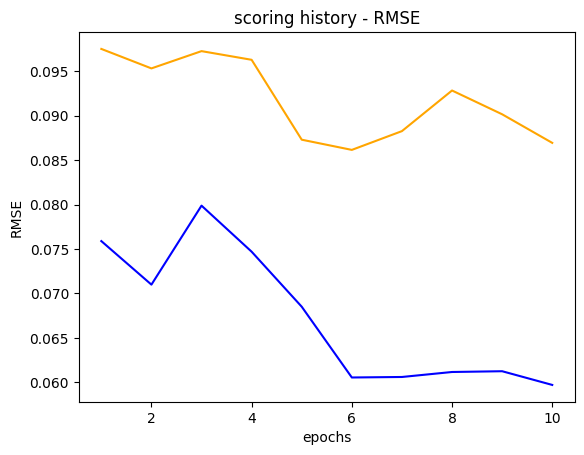

In [23]:
# plot training and validation rmse over time
scoring_history = model.scoring_history()
plt.plot(scoring_history.epochs, scoring_history.training_rmse, c='blue')
plt.plot(scoring_history.epochs, scoring_history.validation_rmse, c='orange')
plt.title('scoring history - RMSE')
plt.xlabel('epochs')
plt.ylabel('RMSE')

In [24]:
# predict on the test data
predicts = model.predict(test_data=test.hex).as_data_frame()
predicts

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


d:\githubProjects\ia-fp5\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict,branco,tinto
0,branco,1.000000,3.157554e-08
1,branco,0.999844,1.556940e-04
2,branco,0.996010,3.989703e-03
3,branco,0.999995,5.236525e-06
4,branco,0.999986,1.385769e-05
...,...,...,...
970,tinto,0.000004,9.999965e-01
971,branco,0.999998,1.910608e-06
972,branco,1.000000,3.044422e-07
973,branco,1.000000,2.994363e-07


In [25]:
# manually compute accuracy for the model on the test data (assumes a threshold of 0.5)
res = test['tipo'].values  == predicts.predict.values
correct = [x for x in res if x]
accuracy = len(correct) / len(res)
print('This DL model gets it right '+str(round(accuracy*100,2))+'% of the times')

This DL model gets it right 98.97% of the times


In [26]:
# get remaining statistics from h2o on the test data
model.model_performance(test.hex)

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.00788295216032534
RMSE: 0.08878599078866745
LogLoss: 0.0751056756453449
Mean Per-Class Error: 0.012033288349077824
AUC: 0.99080994728768
AUCPR: 0.9875954971953531
Gini: 0.98161989457536

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5677941878025424
        branco    tinto    Error    Rate
------  --------  -------  -------  -----------
branco  739       2        0.0027   (2.0/741.0)
tinto   5         229      0.0214   (5.0/234.0)
Total   744       231      0.0072   (7.0/975.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.567794     0.984946  120
max f2                       0.567794     0.981148  120
max f0point5                 0.567794     0.988774  120
max accuracy                 0.567794     0.992821  120
max precision                1            1         0
max recall                   4.12095e-07  1         394
max specificity              1            1         0
max absolute_mcc             0.567794     0.980268  120
max min_per_class_accuracy   0.567794     0.978632  120
max mean_per_class_accuracy  0.567794     0.987967  120
max tns                      1            741       0
max fns                      1            230       0
max fps                      1.04718e-08  741       399
max tps                      4.12095e-07  234       394
max tnr                      1            1         0
max fnr                      1            0.982906  0
max fpr                      1.04718e-08  1         399
max tpr                      4.12095e-07  1         394

Gains/Lift Table: Avg response rate: 24.00 %, avg score: 23.82 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102564                   1                  4.16667    4.16667            1                1            1                           1                   0.042735        0.042735                   316.667   316.667            0.042735
2        0.0205128                   0.999999           4.16667    4.16667            1                1            1                           1                   0.042735        0.0854701                  316.667   316.667            0.0854701
3        0.0317949                   0.999999           4.16667    4.16667            1                0.999999     1                           1                   0.0470085       0.132479                   316.667   316.667            0.132479
4        0.04                        0.999999           4.16667    4.16667            1                0.999999     1                           0.999999            0.034188        0.166667                   316.667   316.667            0.166667
5        0.0502564                   0.999999           4.16667    4.16667            1                0.999999     1                           0.999999            0.042735        0.209402                   316.667   316.667            0.209402
6        0.100513                    0.999996           4.16667    4.16667            1                0.999997     1                           0.999998            0.209402        0.418803                   316.667   316.667            0.418803
7        0.150769                    0.999983           4.16667    4.16667            1                0.999991     1                           0.999996            0.209402        0.628205                   316.6